<a href="https://colab.research.google.com/github/Hasnat65/thesis42/blob/master/Final_acrima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import h5py
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import scipy
import matplotlib.cm as cm
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### From drive 
local_zip = '/content/drive/MyDrive/Colab_Project/Acrima.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
def load_data(data_path, target_size=(224,224)):
    img_arr_img = []
    filelist_img = glob.glob(data_path+"*.jpg")
    image_paths = sorted(filelist_img)
    
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=(224,224))
            #interpolation=cv2.INTER_CUBIC) #/255.0
            #cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths

In [ ]:
path_advance_glaucoma= '/content/Glaucoma/'
path_normal_control = '/content/Non Glaucoma/'

In [ ]:
path_advance_glaucoma

'/content/Glaucoma/'

In [ ]:
X_advance_glaucoma, filenames_advance_glaucoma= load_data(path_advance_glaucoma)
X_normal_control, filenames_normal_control= load_data(path_normal_control)

In [ ]:
X_normal_control.shape

(309, 224, 224, 3)

In [ ]:
# We stack vertically X_infected and X_uninfected to make the data tensor X
X = np.vstack((X_advance_glaucoma, X_normal_control))
# Let's create the labels vector
# 0 stands for  infected
# 1 stands for  not infected
labels = [0]*X_advance_glaucoma.shape[0] + [1]*X_normal_control.shape[0]

In [ ]:
X

array([[[[ 36, 133, 221],
         [ 34, 131, 219],
         [ 33, 130, 218],
         ...,
         [ 29, 104, 196],
         [ 29, 104, 196],
         [ 31, 105, 198]],

        [[ 36, 133, 221],
         [ 34, 131, 219],
         [ 33, 130, 218],
         ...,
         [ 29, 104, 196],
         [ 29, 104, 196],
         [ 30, 105, 197]],

        [[ 34, 131, 219],
         [ 34, 131, 219],
         [ 34, 131, 219],
         ...,
         [ 30, 105, 197],
         [ 30, 105, 197],
         [ 29, 104, 196]],

        ...,

        [[ 31, 109, 215],
         [ 31, 109, 215],
         [ 31, 109, 215],
         ...,
         [ 32,  99, 191],
         [ 34, 101, 193],
         [ 33, 100, 192]],

        [[ 30, 108, 214],
         [ 30, 108, 214],
         [ 31, 109, 215],
         ...,
         [ 34, 101, 193],
         [ 32,  99, 191],
         [ 33, 100, 192]],

        [[ 30, 108, 214],
         [ 33, 111, 216],
         [ 31, 109, 215],
         ...,
         [ 33, 100, 192],
        

In [ ]:
# We need to separate the data into train and test arrays 
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2,random_state=50)

In [ ]:
X_test.shape

(141, 224, 224, 3)

In [ ]:
import numpy as np
y_train=np.array(y_train)
print(y_train.shape)
print(y_train)

(562,)
[1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 0 1 0 0

In [ ]:
import numpy as np
y_test=np.array(y_test)
print(y_test.shape)
print(y_test)

(141,)
[0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1]


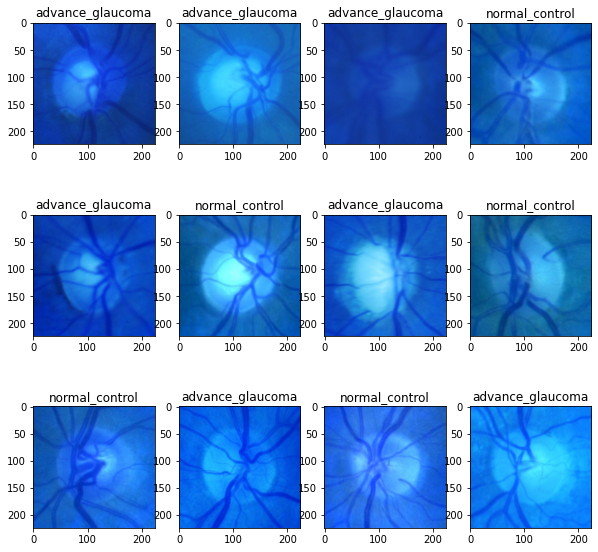

In [ ]:
fig=plt.figure(figsize=(10,10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('advance_glaucoma')
    else:
        plt.title('normal_control')
    
plt.show()

In [ ]:
from keras import backend as K


In [ ]:
IMG_CHANNELS=3
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [ ]:
#Image Data augumentation
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
def create_model(input_shape, with_summary):
    wd = 0.0001
    model = Sequential()
    model.add(Conv2D(64, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    #model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    #model.add(BatchNormalization())
   #model.add(Dropout(0.1))
    
    #model.add(Conv2D(128, kernel_size=3, padding="valid", activation = 'relu',kernel_regularizer=regularizers.l2(wd)))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(units=1000, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=10, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(units=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    if with_summary:
        model.summary()

    return model
  


In [ ]:
def lr_schedule(epoch):
  lrate = 0.001
  if epoch > 75:
    lrate = 0.0001
  if epoch > 100:
    lrate = 0.001
  return lrate

In [ ]:
# Train the CNN Model
from keras import regularizers
from keras.callbacks import LearningRateScheduler
input_shape = (224, 224, 3)
model = create_model(input_shape=input_shape, with_summary=True)
history = model.fit(X_train, y_train,batch_size=64,epochs=100,validation_data=(X_test,y_test), callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
print(model.evaluate(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0

In [ ]:
#Saving - json file & .h5
model_json = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('Acrimamodel.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


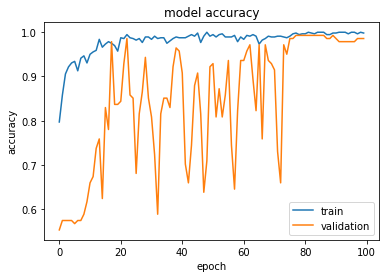

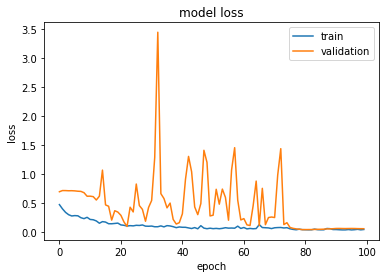

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Detrimine the predictions 
import numpy as np
predictions = model.predict(X_test)
predictions=np.array(predictions)
print(predictions.shape)
print(predictions)

(141, 1)
[[0.00340174]
 [0.00537274]
 [0.0053978 ]
 [0.9924563 ]
 [0.00636134]
 [0.00840921]
 [0.9955166 ]
 [0.00503599]
 [0.0043756 ]
 [0.00511349]
 [0.6102177 ]
 [0.00338727]
 [0.00443614]
 [0.99446505]
 [0.99536175]
 [0.00426248]
 [0.00646031]
 [0.9962561 ]
 [0.9943005 ]
 [0.9945616 ]
 [0.00618451]
 [0.00372064]
 [0.995097  ]
 [0.9976578 ]
 [0.00606774]
 [0.99689674]
 [0.00404613]
 [0.00368572]
 [0.9955389 ]
 [0.00627785]
 [0.00403255]
 [0.99698895]
 [0.9953542 ]
 [0.99585176]
 [0.00461439]
 [0.00430568]
 [0.996992  ]
 [0.00333123]
 [0.9878005 ]
 [0.00338871]
 [0.99423426]
 [0.99661523]
 [0.9960013 ]
 [0.00779699]
 [0.9930328 ]
 [0.00569008]
 [0.00546663]
 [0.00910341]
 [0.00462207]
 [0.9955415 ]
 [0.99380845]
 [0.00788437]
 [0.99126184]
 [0.9942749 ]
 [0.0061987 ]
 [0.00474   ]
 [0.99759394]
 [0.02303303]
 [0.00737089]
 [0.99357915]
 [0.0561186 ]
 [0.9923862 ]
 [0.99661106]
 [0.00572594]
 [0.00462877]
 [0.00387964]
 [0.07398702]
 [0.00607307]
 [0.9904169 ]
 [0.99494123]
 [0.0034440

In [ ]:
model.test_on_batch(X_test, y_test)
model.metrics_names

['loss', 'accuracy']

In [ ]:
history 

In [ ]:
history.history

{'accuracy': [0.7971529960632324,
  0.8576512336730957,
  0.9056939482688904,
  0.9217081665992737,
  0.9306049942970276,
  0.9341636896133423,
  0.9128113985061646,
  0.9412811398506165,
  0.9466192126274109,
  0.9306049942970276,
  0.9501779079437256,
  0.9555160403251648,
  0.9590747356414795,
  0.9839857816696167,
  0.9661921858787537,
  0.9733096361160278,
  0.9786477088928223,
  0.9750889539718628,
  0.9697508811950684,
  0.9572953581809998,
  0.9875444769859314,
  0.9857650995254517,
  0.9946619272232056,
  0.9875444769859314,
  0.9857650995254517,
  0.982206404209137,
  0.9857650995254517,
  0.9768683314323425,
  0.9893238544464111,
  0.9893238544464111,
  0.9839857816696167,
  0.9911032319068909,
  0.9857650995254517,
  0.9875444769859314,
  0.9875444769859314,
  0.9750889539718628,
  0.9804270267486572,
  0.9857650995254517,
  0.9893238544464111,
  0.9875444769859314,
  0.9875444769859314,
  0.9875444769859314,
  0.9911032319068909,
  0.9946619272232056,
  0.9911032319068909,

In [ ]:
Y_pred = model.predict_classes(X_test)
print(np.array(Y_pred ))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [ ]:
from sklearn.metrics import accuracy_score
print('The accuracy obtained on the test set is:', accuracy_score(Y_pred,y_test))

The accuracy obtained on the test set is: 0.9858156028368794


In [ ]:
accuracy_score(y_test, Y_pred, )

0.9858156028368794

In [ ]:
import seaborn as sns
def draw_confusion_matrix(true,preds):
  conf_matx = confusion_matrix(true, preds)
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_pred))

[[80  1]
 [ 1 59]]


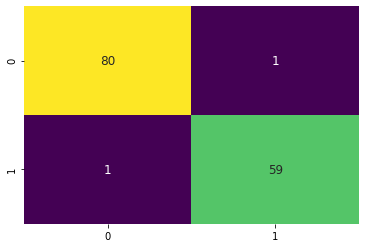

Confusion Matrix
                  precision    recall  f1-score   support

Advance Glaucoma       0.99      0.99      0.99        81
  Normal Control       0.98      0.98      0.98        60

        accuracy                           0.99       141
       macro avg       0.99      0.99      0.99       141
    weighted avg       0.99      0.99      0.99       141



In [ ]:

from sklearn.metrics import classification_report 
draw_confusion_matrix(y_test,Y_pred)
print('Confusion Matrix')
target_names = ['Advance Glaucoma', 'Normal Control']
print(classification_report(y_test, Y_pred, target_names=target_names))

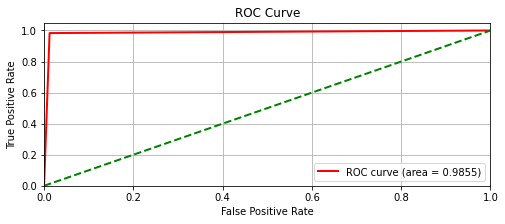

In [ ]:
# Setup
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_test, Y_pred)
# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)
# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, Y_pred)
plt.figure(figsize=(8, 3))
plt.subplot(1,1,1)
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

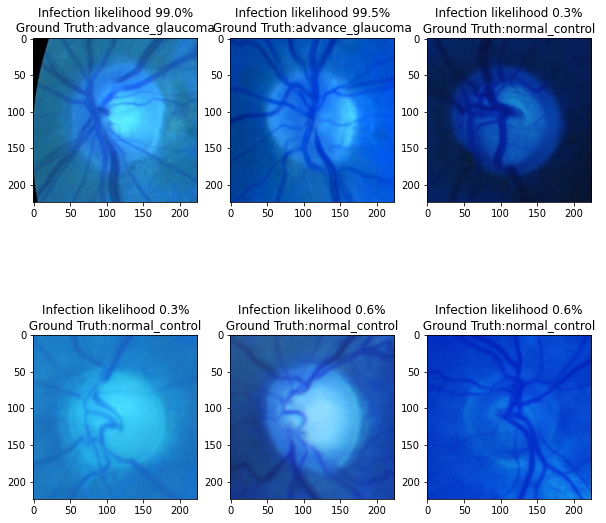

In [ ]:
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['normal_control', 'advance_glaucoma']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()